In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

insurance = pd.read_csv("Data/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

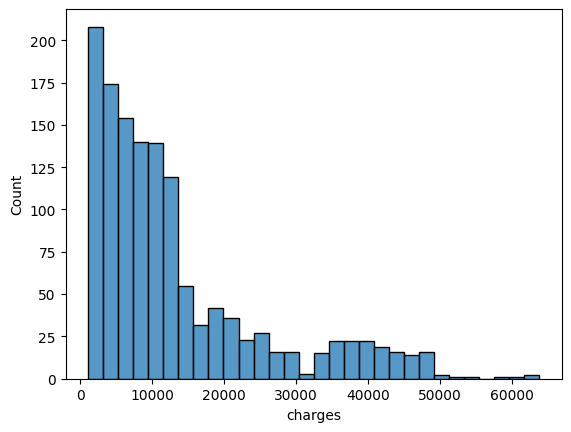

In [7]:
sns.histplot(insurance["charges"])

<Axes: xlabel='charges'>

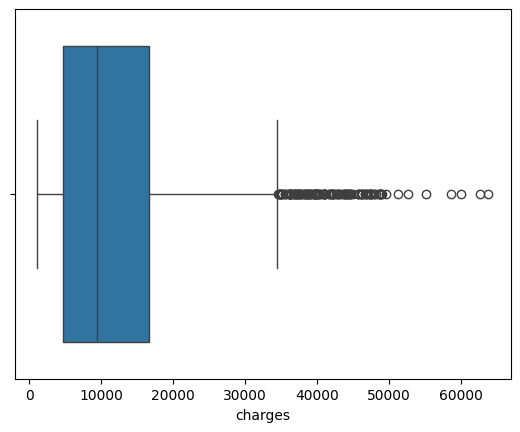

In [8]:
sns.boxplot(x=insurance["charges"])

<Axes: xlabel='charges'>

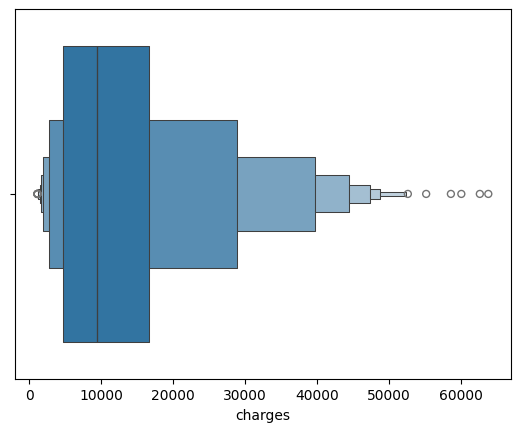

In [9]:
sns.boxenplot(x=insurance["charges"])

<Axes: xlabel='age', ylabel='Count'>

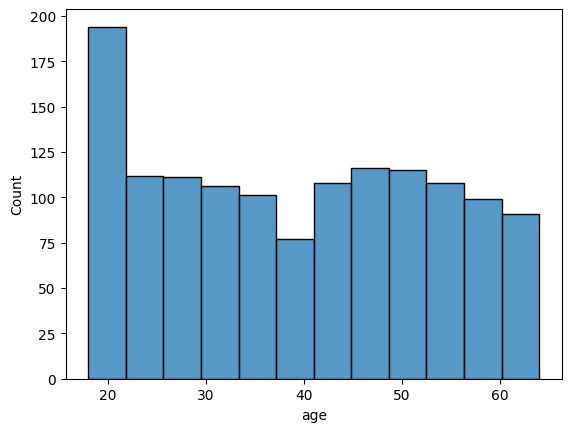

In [10]:
sns.histplot(x=insurance["age"])

In [11]:
insurance["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
corr = insurance.corr(numeric_only=True)

<Axes: >

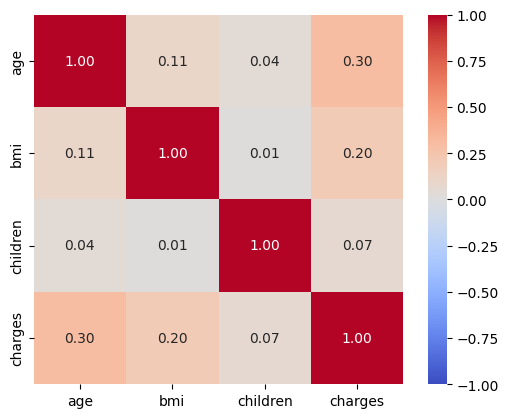

In [14]:
# Correlation graf
sns.heatmap(corr, fmt='.2f', vmin=-1, vmax=1, annot=True, cbar=True, square=True, cmap="coolwarm")

<Axes: xlabel='age', ylabel='charges'>

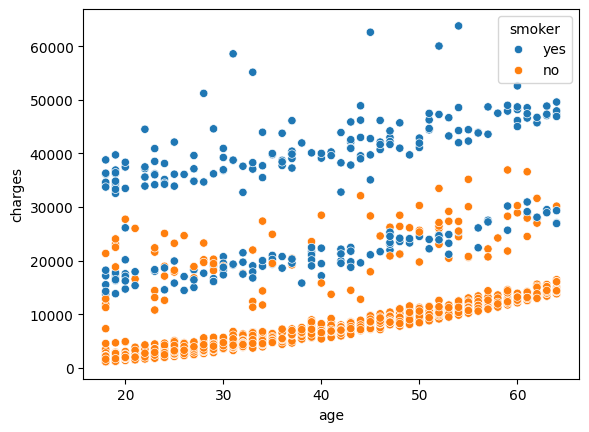

In [15]:
# Correlation between age and charges for smokers and no-smokers
sns.scatterplot(insurance, x="age", y="charges", hue="smoker")

<Axes: xlabel='age', ylabel='charges'>

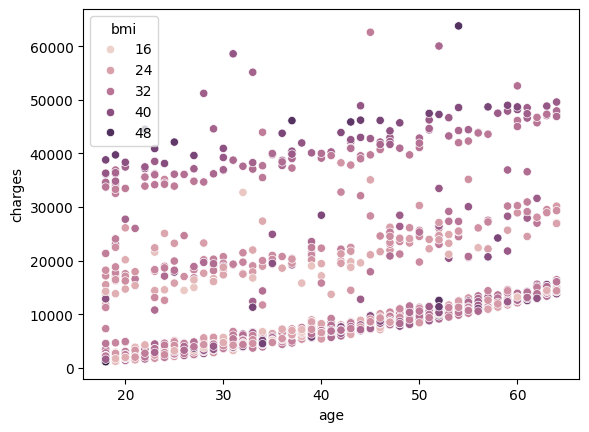

In [16]:
# Correlation between age and charges with bmi values
sns.scatterplot(insurance, x="age", y="charges", hue="bmi")

<Axes: xlabel='smoker'>

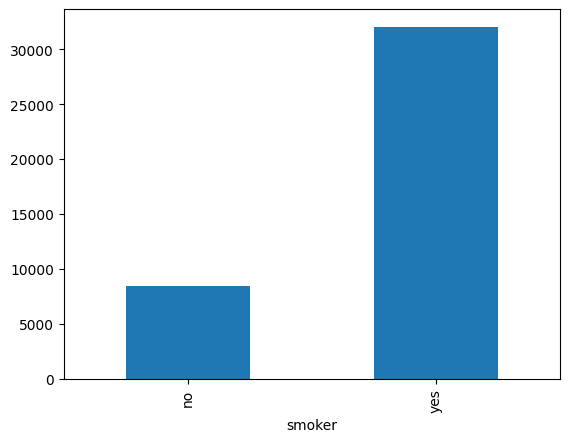

In [17]:
# How smker column impact price for insurance
insurance.groupby("smoker")["charges"].mean().plot.bar()

<Axes: xlabel='age', ylabel='bmi'>

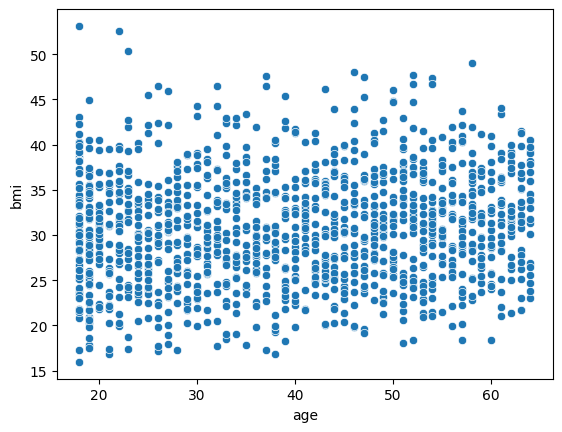

In [18]:
sns.scatterplot(insurance, x="age", y="bmi")

<Axes: xlabel='smoker'>

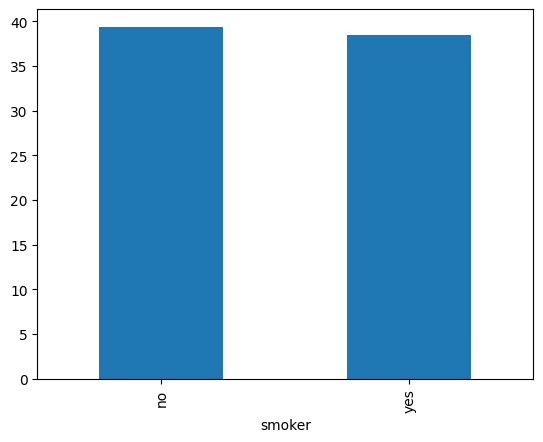

In [19]:
insurance.groupby("smoker")["age"].mean().plot.bar()

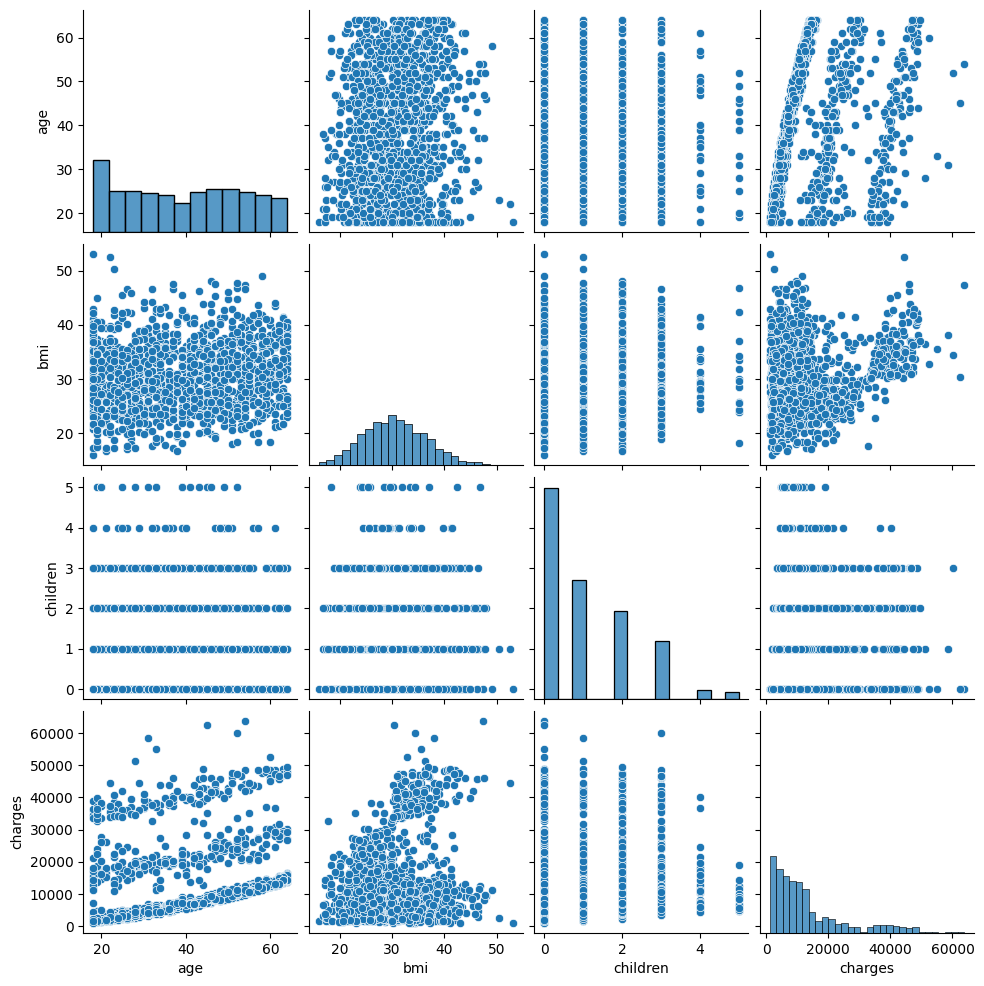

In [20]:
sns.pairplot(insurance)

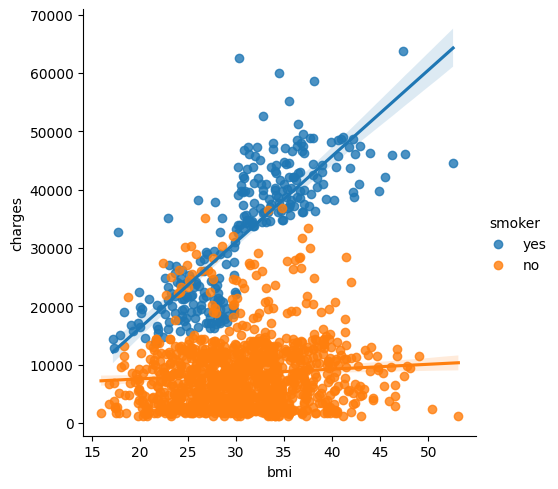

In [21]:
# Checking correlation between bmi and charges and how column "smoker" impact the result
sns.lmplot(insurance, x="bmi", y="charges", hue="smoker")

In [22]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [23]:
# Making X and y variables for model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
X = sm.add_constant(insurance["age"])
y = insurance["charges"]

In [24]:
# Building model
model = sm.OLS(y, X).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           4.89e-29
Time:                        21:23:03   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Build predictors for prediction: add constant and age
customer_ages = [18, 25, 35, 45, 55]
X_predict = sm.add_constant(pd.DataFrame({"age": customer_ages}))
X_predict

,const,age
0,1.0,18
1,1.0,25
2,1.0,35
3,1.0,45
4,1.0,55


In [27]:
predictions = model.predict(X_predict)
predictions.name = "predictions"

In [28]:
predictions

0     7804.892142
1     9608.950473
2    12186.176659
3    14763.402846
4    17340.629033
Name: predictions, dtype: float64

In [29]:
# Filter to ages in customer_ages, compute mean charges per age, merge with predictions by index, then add 'error' = prediction − actual mean charges.
(insurance
 .query("age in @customer_ages")
 .groupby("age")
 .agg({"charges": "mean"})
 .reset_index()
 .merge(predictions, left_index=True, right_index=True)
 .assign(
     error = lambda x: x["predictions"] - x["charges"]
 )
)

,age,charges,predictions,error
0,18,7086.217556,7804.892142,718.674586
1,25,9838.365311,9608.950473,-229.414838
2,35,11307.182031,12186.176659,878.994628
3,45,14830.199856,14763.402846,-66.797010
4,55,16164.545488,17340.629033,1176.083544


<Axes: ylabel='None'>

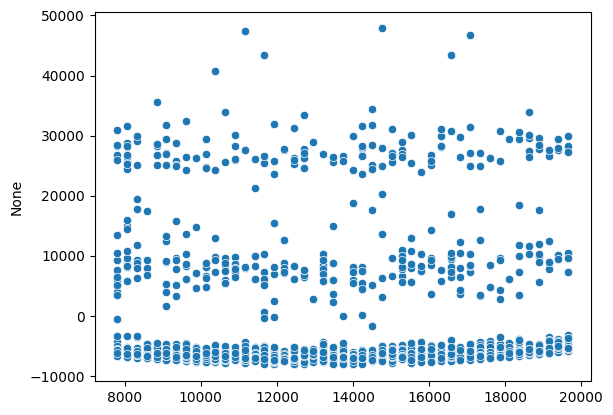

In [30]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [43]:
# Adding more feauters to model
features = [
    "age", 
    "bmi", 
    "children"
]
X_2 = sm.add_constant(insurance[features])

model = sm.OLS(y, X_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           8.80e-37
Time:                        20:52:07   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

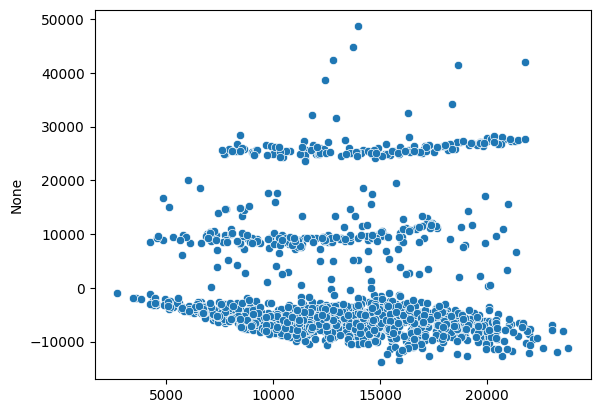

In [44]:
# Residual plot gets a bit tighter- model errors decreasing here
sns.scatterplot(x=model.predict(), y=model.resid)

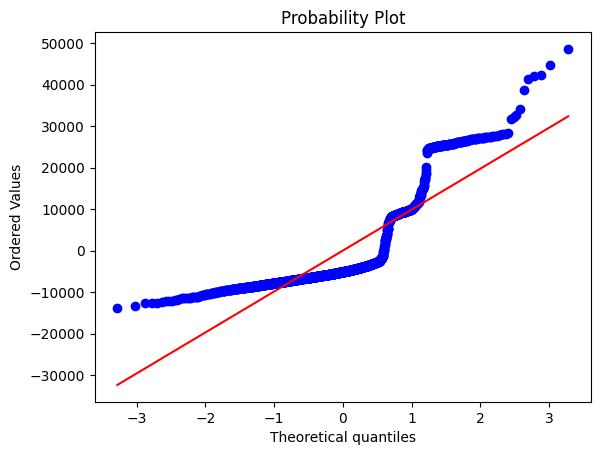

In [46]:
# Checking normality of errors
import scipy.stats as stats
import matplotlib.pyplot as plt

stats. probplot(model.resid, dist="norm", plot=plt);

In [48]:
# Trying to improve normality of error by log charges variable
features_3 = ["age", "bmi", "children"]

X = sm.add_constant(insurance[features_3])
y = np.log(insurance["charges"])

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          2.82e-104
Time:                        20:57:50   Log-Likelihood:                -1543.9
No. Observations:                1338   AIC:                             3096.
Df Residuals:                    1334   BIC:                             3117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3189      0.119     61.643      0.000       7.086       7.552
age            0.0336      0.002     22.331      0.000       0.031       0.037
bmi            0.0113      0.003      3.252      0.001       0.004       0.018
children       0.1057      0.017      6.058      0.000       0.071       0.140
==============================================================================
Omnibus:                      193.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.149
Skew:                           1.125   Prob(JB):                     1.20e-62
Kurtosis:                       3.219   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

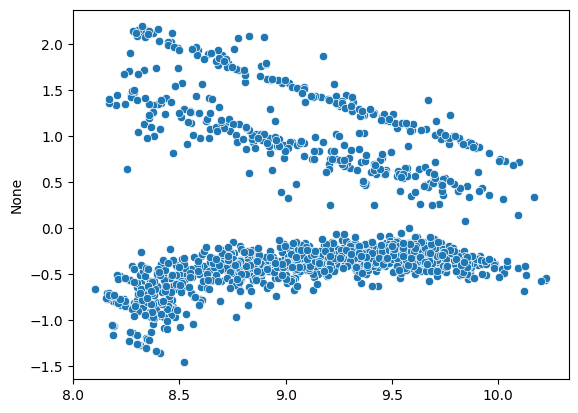

In [50]:
# Checking residual plot for new model
sns.scatterplot(x=model.predict(), y=model.resid)

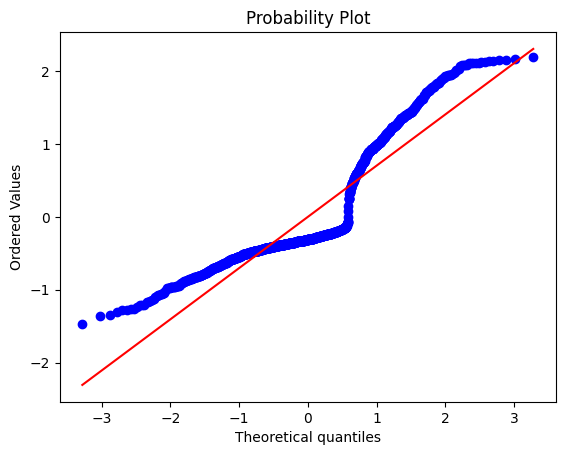

In [52]:
# Checking probability plot. But is still not normal.
stats. probplot(model.resid, dist="norm", plot=plt);

In [33]:
# Create a 4-row DataFrame with 0/min/mean/max for age and BMI 
new_data = pd.DataFrame({
    "age": [0, insurance["age"].min(), insurance["age"].mean(), insurance["age"].max()],
    "bmi": [0, insurance["bmi"].min(), insurance["bmi"].mean(), insurance["bmi"].max()]
})

new_data

,age,bmi
0,0.000000,0.000000
1,18.000000,15.960000
2,39.207025,30.663397
3,64.000000,53.130000


In [34]:
X = sm.add_constant(new_data)

model.predict(X)

0    -6424.804612
1     3244.072239
2    13270.422265
3    26749.200448
dtype: float64

In [35]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {np.sqrt(mae(y, model.predict()))}")

MAE: 9032.478003391378
RMSE: 95.03934976309222


<Axes: xlabel='age', ylabel='charges'>

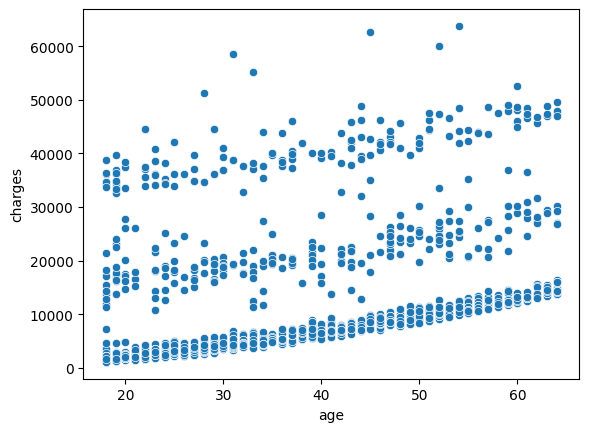

In [37]:
sns.scatterplot(insurance, x="age", y="charges")

In [39]:
features_2 = ["age"]

X = sm.add_constant(insurance[features_2])
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           4.89e-29
Time:                        22:33:09   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

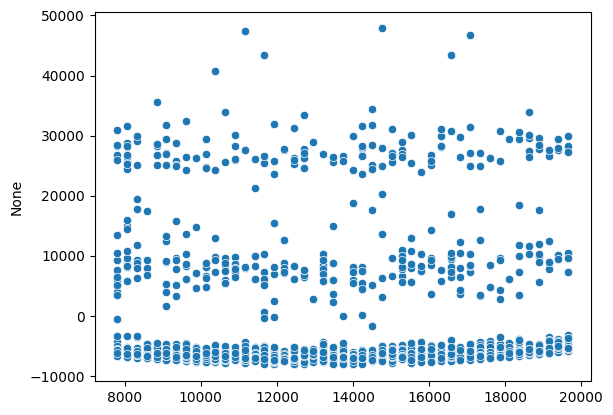

In [42]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [54]:
# Checking influence
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_age,dfb_bmi,dfb_children,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.065298,-0.071096,-0.015194,-0.044172,0.002636,1.905514,0.002896,0.102685,1.907397,0.102787
1,-0.012113,0.053738,-0.023192,0.000690,0.001091,-1.247698,0.002796,-0.066067,-1.247959,-0.066081
2,0.000814,0.017848,-0.009017,-0.031598,0.000428,-0.715736,0.003334,-0.041396,-0.715605,-0.041388
3,0.073909,-0.012403,-0.058981,-0.041289,0.001960,1.712041,0.002668,0.088553,1.713283,0.088617
4,-0.012271,0.007332,0.003783,0.014526,0.000142,-0.599588,0.001573,-0.023797,-0.599444,-0.023792
